In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import glob

In [2]:
!pwd

/Users/Devansh/Documents/GitHub/deep_learnt_controls/Simple_Spacecraft


In [3]:
#collate data
df_s_full = pd.DataFrame()

In [4]:
data_s = []
first_row_s = []
data_c = []
first_row_c = []
for infile in glob.glob("data_apollo/*_sim_s.csv"):
    df = pd.read_csv(infile)
    
    data_s.append(df)
    first_row_s.append(list(df.iloc[0]))
    
for infile in glob.glob("data_apollo/*_sim_c.csv"):
    df = pd.read_csv(infile)
    
    data_c.append(df)
    first_row_c.append(list(df.iloc[0]))
    
    
df_s_full = pd.concat(data_s)
df_s_first = pd.DataFrame(first_row_s)
    
df_c_full = pd.concat(data_c)
df_c_first = pd.DataFrame(first_row_c)

In [36]:
if 0:
    df_s_full.to_csv('data_apollo/df_s_full.csv', index=False)
    df_c_full.to_csv('data_apollo/df_c_full.csv', index=False)
    

In [5]:
df_s_full.describe()

,0,1,2,3,4
count,301599.000000,301599.000000,301599.000000,301599.000000,301599.000000
mean,-49.438482,337.950340,0.073820,-4.929270,9079.120676
std,113.429058,413.739778,1.581204,5.569180,1310.316010
min,-577.624746,-0.000065,-9.999447,-29.999132,4923.601352
25%,-89.742405,20.214269,-0.316188,-7.174153,8097.970155
50%,-9.243086,156.872110,0.087565,-2.883491,9051.414548
75%,3.469406,528.035097,0.772789,-0.726322,10093.130162
max,251.712211,1999.480004,9.835361,0.020953,11999.443793


In [6]:
df_s_first.describe()

,0,1,2,3,4
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,-20.159994,1233.287346,-1.818438,-18.144977,10045.119995
std,111.533327,428.835032,4.831662,7.235343,1155.474627
min,-199.389028,500.047985,-9.999447,-29.999132,8002.257587
25%,-117.043527,865.335565,-5.720821,-24.355288,9061.186365
50%,-28.791394,1220.963142,-2.091256,-18.327801,10047.434970
75%,67.357277,1614.276260,1.769795,-12.449540,11023.993614
max,199.441169,1999.480004,9.835361,-1.782845,11999.443793


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0b66d8>],
      dtype=object)

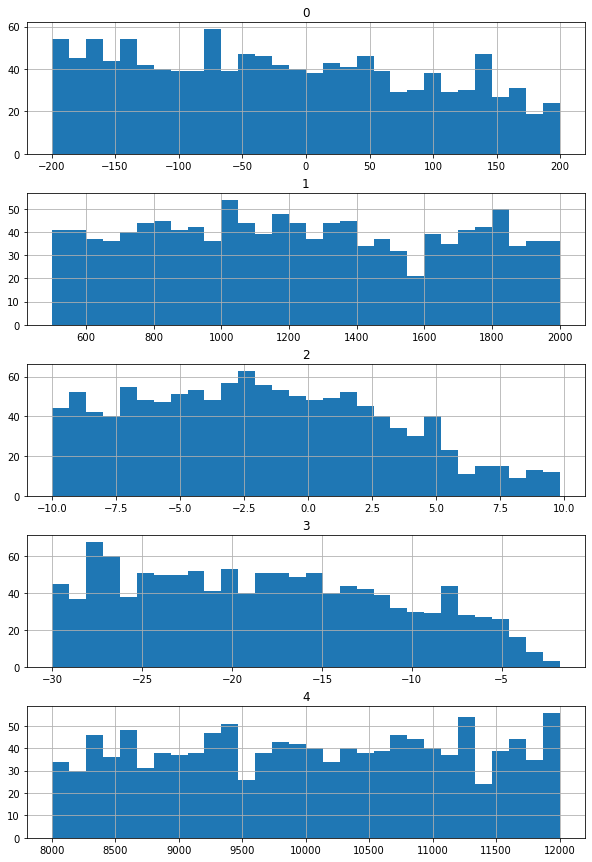

In [7]:
df_s_first.hist(bins=30, figsize=(10,15), layout=(5,1))

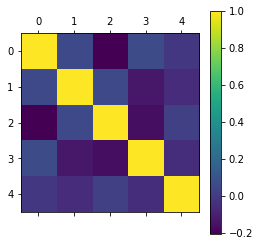

In [8]:
plt.matshow(df_s_first.corr())
plt.colorbar()

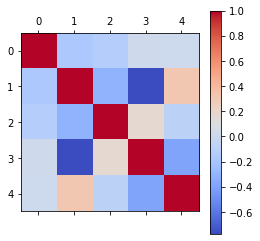

In [9]:
plt.matshow(df_s_full.corr())
plt.colorbar()
plt.set_cmap('coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bc74470>],
      dtype=object)

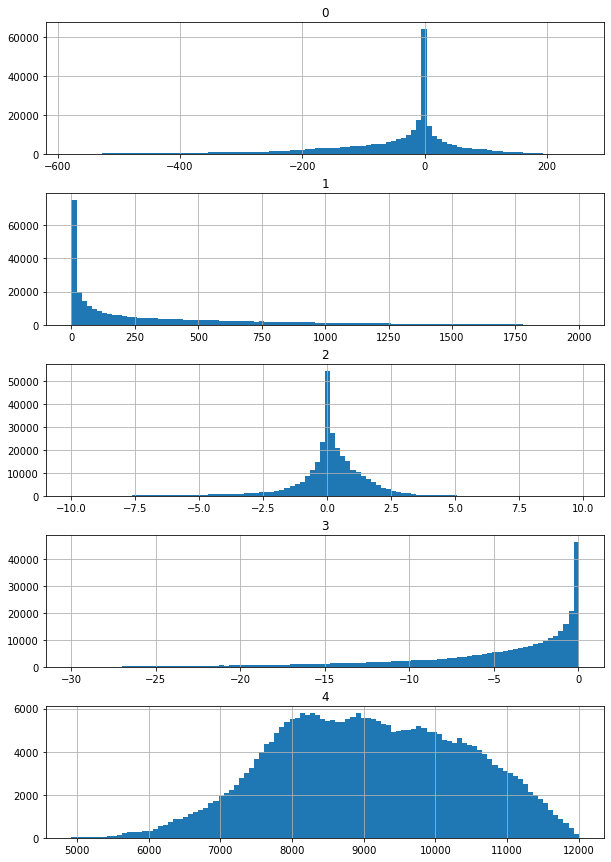

In [10]:
df_s_full.hist(bins=100, figsize=(10,15), layout=(5,1))

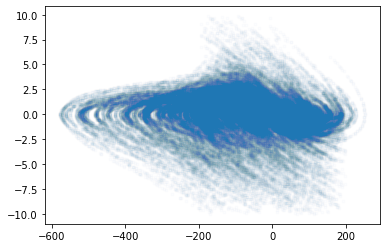

In [11]:
plt.scatter(df_s_full['0'],df_s_full['2'],marker='.',alpha=0.01)

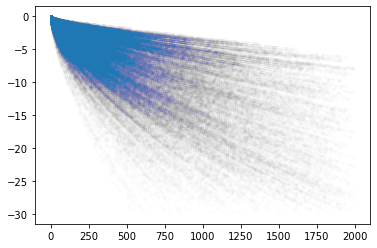

In [24]:
plt.scatter(df_s_full['1'],df_s_full['3'],marker='.',alpha=0.005)

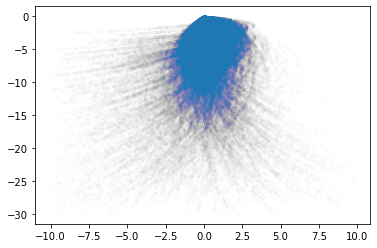

In [26]:
plt.scatter(df_s_full['2'],df_s_full['3'],marker='.',alpha=0.005)

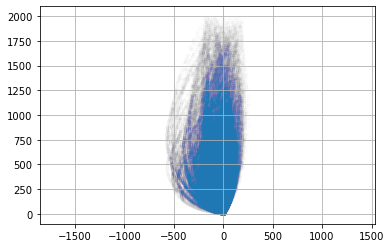

In [27]:
plt.scatter(df_s_full['0'],df_s_full['1'],marker='.',alpha=0.005)
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.grid()

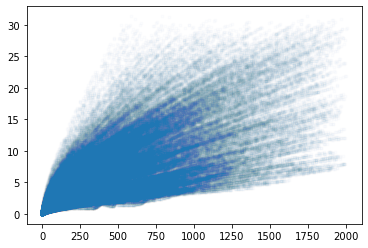

In [28]:
plt.scatter((df_s_full['0']**2+df_s_full['1']**2)**0.5,(df_s_full['2']**2+df_s_full['3']**2)**0.5,marker='.',alpha=0.01)

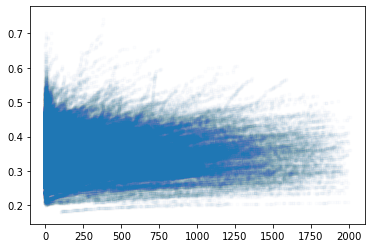

In [29]:
plt.scatter((df_s_full['0']**2+df_s_full['1']**2)**0.5,df_c_full['0'],marker='.',alpha=0.01)

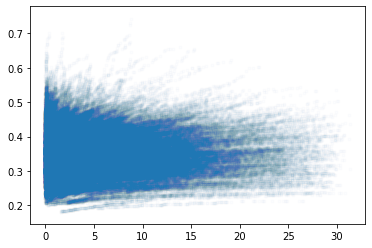

In [30]:
plt.scatter((df_s_full['2']**2+df_s_full['3']**2)**0.5,df_c_full['0'],marker='.',alpha=0.01)

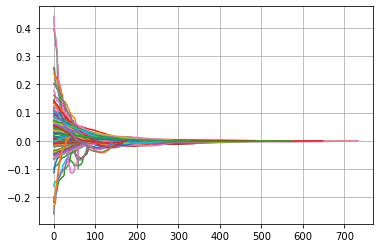

In [31]:
plt.figure()

for ind in range(100):
    try:
        df = pd.read_csv(f'data_apollo/{ind}_sim_c.csv')
        plt.plot(df['1'])
    except:

        pass

ax = plt.gca()
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9f31d0>],
      dtype=object)

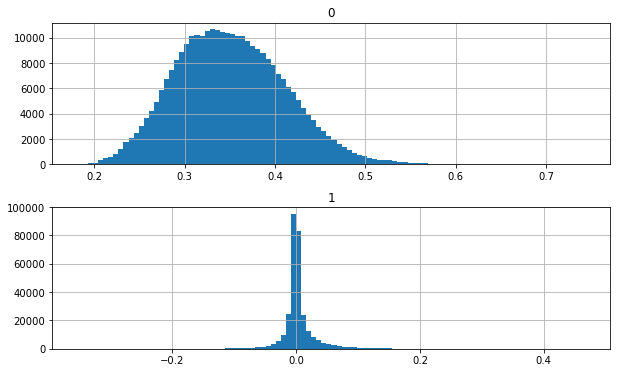

In [32]:
df_c_full.hist(bins=100, figsize=(10,6), layout=(2,1))

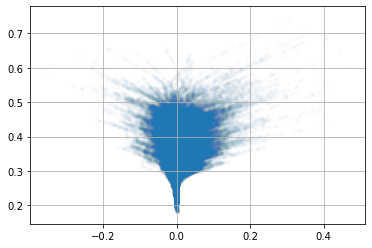

In [20]:
plt.scatter(df_c_full['1'],df_c_full['0'],marker='.',alpha=0.01)
plt.grid()

In [21]:
df.describe()

,0,1
count,143.000000,143.000000
mean,0.427766,0.010496
std,0.028303,0.041039
min,0.379161,-0.027300
25%,0.403275,-0.022531
50%,0.428412,-0.007469
75%,0.452090,0.038429
max,0.477264,0.107293


In [22]:
df['0'].max()

0.4772642275363005

In [23]:

for infile in glob.glob("data_apollo/*_sim_s.csv"):
    df = pd.read_csv(infile)
    
    if min(df['1'])>10:
        print(infile)